In [24]:
import pandas as pd
from ast import literal_eval
import numpy as np
import math
import matplotlib.pyplot as plt


class VideoTrajectory:
    def __init__(self, path):
        self.path = path
        trajectory = pd.read_csv(path, names=['A', 'B'])
        # convert string to tuples
        for ball in ['A', 'B']:
            trajectory[ball] =  trajectory[ball].apply(literal_eval)
        # compute distance between balls per frame
        trajectory['distance']= [np.linalg.norm(np.asarray(trajectory.loc[t, 'A']) - np.asarray(trajectory.loc[t, 'B'])) for t in range(250)]
        self.trajectory = trajectory

    def plotBallDists(self):
        plt.plot(self.trajectory.distance)
        plt.xlabel("Frames")
        plt.ylabel("Distance between A and B")

    def getCollisionParams(self):
        if '9a' or '10a' in self.path:
            t_collision = self.trajectory['distance'].iloc[30:].idxmin()
        else:
            t_collision = self.trajectory['distance'].idxmin()  #becuase python starts w 0
        self.t_collision = t_collision
        dframes = 2
        p1 = self.trajectory.iloc[t_collision - dframes]['A']
        p2 = self.trajectory.iloc[t_collision]['A']
        self.p1 = {'frame_'+str((t_collision-dframes)): p1 }
        self.p2 = {'frame_'+str(t_collision): p2 }
        self.p0 = {'frame_'+str(t_collision - dframes - 5): self.trajectory.iloc[t_collision - dframes - 5]['A']}
        angle = math.degrees(math.atan(abs(p1[1] - p2[1])/abs(p1[0] - p2[0])))
        self.collisionAngle_A = angle
        self.compute_vel()
        print('stimulus: '+self.path.split('.csv')[0])
        print(f'Collision frame number: {t_collision} \nCollision xy location: {self.trajectory.loc[t_collision, "A"]} \nCollision angle: {angle}')
        print(f'Ball A\'s instantaneous velocity at collision: {self.velocity[t_collision]}')

    def compute_vel(self):
        self.trajectory['A_fwd'] = 0 # frame-wise displacement
        self.trajectory.loc[range(1,len(self.trajectory)), 'A_fwd'] = [np.linalg.norm(np.array(self.trajectory.A[t-1])
                                                                                      - np.array(self.trajectory.A[t]))
                                                                       for t in range(1, len(self.trajectory))]
        self.velocity = np.gradient(self.trajectory.A_fwd.cumsum())

    def plotTrajectores(self, title):
        plt.scatter(*zip(*self.trajectory.B))
        plt.scatter(*zip(*self.trajectory.A))
        plt.title(title)

    def plotAvelocity(self):
        self.compute_vel()
        plt.plot(np.gradient(self.trajectory.A_fwd.cumsum()))


def trajectory_difference(stim1, stim2, ball):
    t_diffs = []
    for t in range(len(stim1.trajectory)):
        t_diffs.append(np.linalg.norm(np.asarray(stim1.trajectory.loc[t, ball]) - np.asarray(stim2.trajectory.loc[t, ball])))
    if ball == 'A':
        t_diffs = t_diffs[stim2.t_collision:]

    plt.plot(t_diffs)
    print(f'Total difference between trajectories: {sum(t_diffs)}')

def plot_stimTrajectory(stim1, stim2, filename):
    f, a = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)

    a[0].scatter(*zip(*stim1.trajectory.B), )
    a[0].scatter(*zip(*stim1.trajectory.A))
    a[0].set_title("INANIMATE")
    a[0].set_aspect(2)
    a[1].scatter(*zip(*stim2.trajectory.B))
    a[1].scatter(*zip(*stim2.trajectory.A))
    a[1].set_title("ANIMATE")
    a[1].set_aspect(2)
    plt.savefig(filename)

## Physical stimulus collision parameters & trajectory

stimulus: trajectoryFiles/24_p_out_in
Collision frame number: 115 
Collision xy location: (37.69568634033203, 9.528247833251953, 0.9988230466842651) 
Collision angle: 8.128005756817092
Ball A's instantaneous velocity at collision: 0.5893122906814519

{'frame_108': (32.70823287963867, 8.81571102142334, 1.1790534257888794)}
{'frame_113': (36.287288665771484, 9.32710075378418, 1.0638574361801147)}


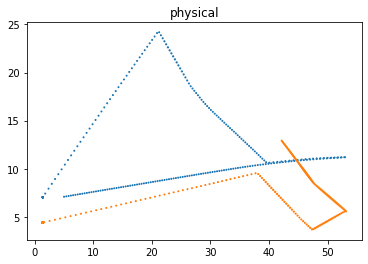

In [25]:
stim1 = VideoTrajectory('trajectoryFiles/24_p_out_in.csv')
stim1.getCollisionParams()
print('')
print(stim1.p0)
print(stim1.p1)
stim1.plotTrajectores('physical')

## Comparing Physical and Animated Collision Parameters

In [26]:
stim1.getCollisionParams()
print('')
stim2 = VideoTrajectory('trajectoryFiles/24_a_out_in.csv')
stim2.getCollisionParams()

stimulus: trajectoryFiles/24_p_out_in
Collision frame number: 115 
Collision xy location: (37.69568634033203, 9.528247833251953, 0.9988230466842651) 
Collision angle: 8.128005756817092
Ball A's instantaneous velocity at collision: 0.5893122906814519

stimulus: trajectoryFiles/24_a_out_in
Collision frame number: 115 
Collision xy location: (37.69568634033203, 9.528247833251953, 0.9988230466842651) 
Collision angle: 8.128005756817092
Ball A's instantaneous velocity at collision: 0.5893122906814483


## Ensure alls follows the same trajectory across physical and animate stimuli

Total difference between trajectories: 0.0


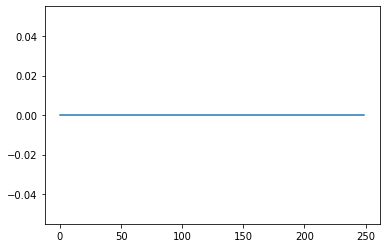

In [27]:
trajectory_difference(stim1, stim2, 'B')

Total difference between trajectories: 0.0


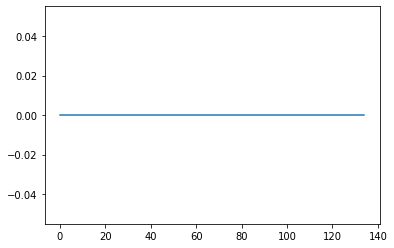

In [28]:
trajectory_difference(stim1, stim2, 'A')

## save the trajectory images

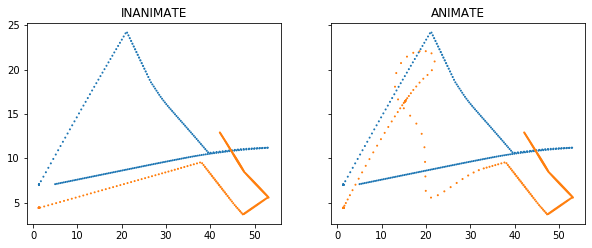

In [29]:
plot_stimTrajectory(stim1, stim2, 'trajectory_imgs/24_out_in_trajectories.png')

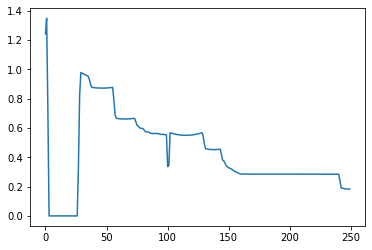

In [36]:
stim1.plotAvelocity()

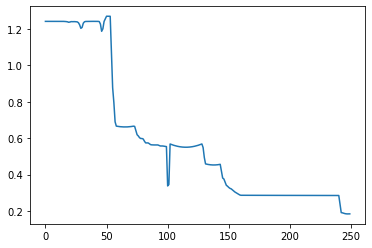

In [37]:
stim2.plotAvelocity()


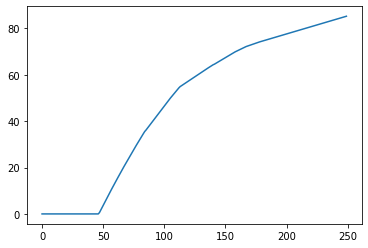

In [30]:
traj = stim1.trajectory
traj['A_fwd'] = 0
traj.loc[range(1,len(traj)), 'A_fwd'] = [np.linalg.norm(np.array(traj.A[t-1]) - np.array(traj.A[t])) for t in range(1, len(traj))]
plt.plot(traj.A_fwd.cumsum())

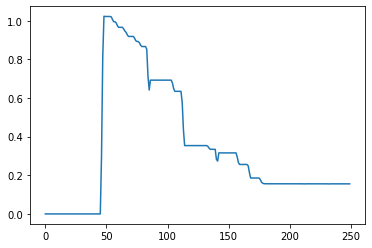

In [31]:
plt.plot(np.gradient(traj.A_fwd.cumsum()))

In [32]:
stim1.t_collision

113

In [33]:
np.gradient(traj.A_fwd.cumsum())[113]

0.43696589027097943

In [ ]:
import matplotlib.pyplot as plt
plt.plot(trajectory.distance)

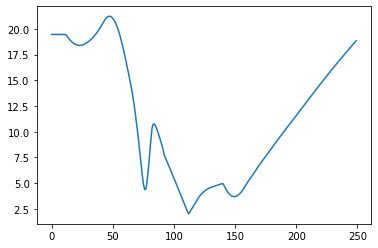

In [22]:
import matplotlib.pyplot as plt
plt.plot(trajectory.distance)

Finding ball A's angle of impact

In [15]:
t_collision = trajectory['distance'].idxmin()  #becuase python starts w 0
dframes = 20
p1 = trajectory.iloc[t_collision - dframes]['A']
p2 = trajectory.iloc[t_collision]['A']
angle = math.degrees(math.atan(abs(p1[1] - p2[1])/abs(p1[0] - p2[0])))
print(f'at frame {t_collision}, ball A was in location {trajectory.loc[t_collision, "A"]} moving at angle of {angle}')

at frame 112, ball A was in location (42.72854232788086, 15.824227333068848) moving at angle of 44.30284722891754


In [23]:
t_collision = trajectory['distance'].idxmin()  #becuase python starts w 0
dframes = 20
p1 = trajectory.iloc[t_collision - dframes]['A']
p2 = trajectory.iloc[t_collision]['A']
angle = math.degrees(math.atan(abs(p1[1] - p2[1])/abs(p1[0] - p2[0])))
print(f'at frame {t_collision}, ball A was in location {trajectory.loc[t_collision, "A"]} moving at angle of {angle}')

at frame 112, ball A was in location (42.721778869628906, 15.795257568359375) moving at angle of 44.305303649340026


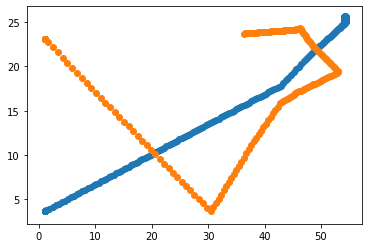

In [20]:
plt.scatter(*zip(*trajectory.B))
plt.scatter(*zip(*trajectory.A))

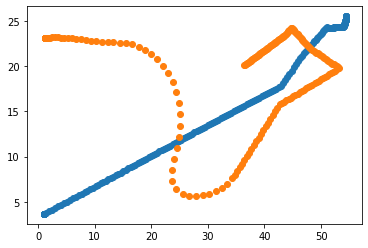

In [24]:
plt.scatter(*zip(*trajectory.B))
plt.scatter(*zip(*trajectory.A))

In [ ]:
import seaborn as sns
sns.scatterplot()

I have location, time of collision, and angle figured. Post collision trajectories still vary because velocities vary.
Probably don't need to worry about momentum since mass is contant across conditions.

In [17]:
# vel  = distance/ time
#SOHCAHTOA
d = abs(p1[0]-p2[0])/math.cos(angle)
v = d/dframes
v

0.45521225864779274

In [18]:
p1


(34.08804702758789, 7.391482830047607)

In [12]:
v1 = videoTrajectory(path='2p_in_out_close.csv')
v1.getCollisionParams()

stimulus: 2p_in_out_close
Ball A collided at frame 113. 
It was in location (44.60675811767578, 10.906232833862305) 
and moving at angle of 41.520343926199196


In [13]:
v2 = videoTrajectory(path='2a_in_out_close.csv')
v2.getCollisionParams()

stimulus: 2a_in_out_close
Ball A collided at frame 113. 
It was in location (44.56947708129883, 10.90661907196045) 
and moving at angle of 42.061842989205196


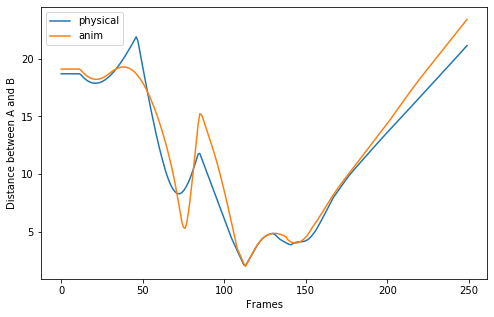

In [14]:
f, a = plt.subplots(figsize=(8,5), sharey=True)
v1.plotBallDists()
v2.plotBallDists()
plt.legend(['physical', 'anim'])
plt.savefig('v2_p_a_ballDists.png')

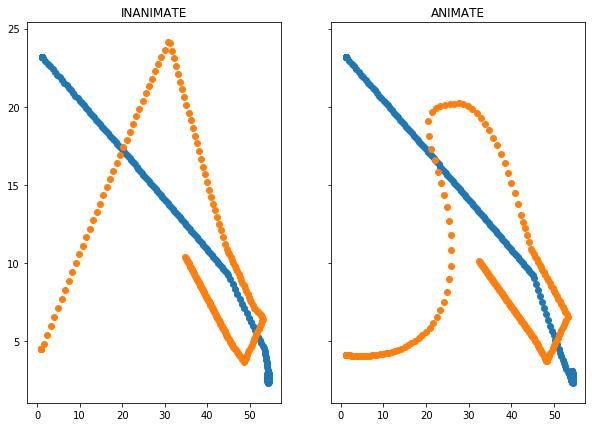

In [15]:
f, a = plt.subplots(figsize=(10,7),ncols=2, sharey=True)

a[0].scatter(*zip(*v1.trajectory.B))
a[0].scatter(*zip(*v1.trajectory.A))
a[0].set_title("INANIMATE")
a[1].scatter(*zip(*v2.trajectory.B))
a[1].scatter(*zip(*v2.trajectory.A))
a[1].set_title("ANIMATE")
plt.savefig('v2_p_a_trajectories.png')

In [75]:
a1 = a[0]
a1.sc

In [19]:
from moviepy.editor import *
import os
from natsort import natsorted

L =[]

for root, dirs, files in os.walk("blend/"):

    #files.sort()
    files = natsorted(files)
    for file in files:
        if os.path.splitext(file)[1] == '.mp4':
            filePath = os.path.join(root, file)
            video = VideoFileClip(filePath, fps_source='fps')
            L.append(video)

final_clip = concatenate_videoclips(L)
final_clip.to_videofile("output.mp4", fps=30, remove_temp=False)

t:  10%|█         | 26/252 [00:00<00:00, 256.13it/s, now=None]

Moviepy - Building video output.mp4.
Moviepy - Writing video output.mp4



Moviepy - Done !
Moviepy - video ready output.mp4
